In [29]:
from textbenchmark import loaddata # Importing the textbenchmark module
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import pandas as pd

### Loading the works of Jules Verne

In [15]:
journey = loaddata.load_author_text(author="Jules Verne", nameoftext="A Journey to the Centre of the Earth")
around_the_world = loaddata.load_author_text(author="Jules Verne", nameoftext="Around the World in Eighty Days")
eight_hundred = loaddata.load_author_text(author="Jules Verne", nameoftext="Eight Hundred Leagues on the Amazon")
facing = loaddata.load_author_text(author="Jules Verne", nameoftext="Facing the Flag")
twenty_thousand = loaddata.load_author_text(author="Jules Verne", nameoftext="Twenty Thousand Leagues under the Sea")

### Loading the works of Charles Dickens

In [13]:
barnaby_rudge = loaddata.load_author_text(author="Charles Dickens", nameoftext="Barnaby Rudge")
david_copperfield = loaddata.load_author_text(author="Charles Dickens", nameoftext="David Copperfield")
great_expectations = loaddata.load_author_text(author="Charles Dickens", nameoftext="David Copperfield")
oliver_twist = loaddata.load_author_text(author="Charles Dickens", nameoftext="Oliver Twist")
battle = loaddata.load_author_text(author="Charles Dickens", nameoftext="The Battle of Life")

### Loading the works of Herman Melville

In [16]:
battle_war = loaddata.load_author_text(author="Herman Melville", nameoftext="Battle-Pieces and Aspects of the War")
israel_potter = loaddata.load_author_text(author="Herman Melville", nameoftext="Israel Potter")
moby_dick = loaddata.load_author_text(author="Herman Melville", nameoftext="Moby Dick")
omoo = loaddata.load_author_text(author="Herman Melville", nameoftext="Omoo Adventures in the South Seas")
confidence_man = loaddata.load_author_text(author="Herman Melville", nameoftext="The Confidence-Man His Masquerade")

### Compiling the documents into a list

In [18]:
author_texts = [journey, around_the_world, eight_hundred, facing, twenty_thousand, 
         barnaby_rudge, david_copperfield, great_expectations, oliver_twist, battle,
        battle_war, israel_potter, moby_dick, omoo, confidence_man]

### Pre-processing Documents

In [19]:
tokenizer = RegexpTokenizer(r'\w+')

In [20]:
# create English stop words list
en_stop = get_stop_words('en')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

### Running the LDA Model

In [21]:
texts = []
for i in author_texts:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

# print the topics
[print(line) for line in ldamodel.print_topics(num_topics=3, num_words=10)]

(0, '0.006*"one" + 0.004*"said" + 0.004*"man" + 0.004*"now" + 0.004*"will" + 0.004*"s" + 0.003*"like" + 0.003*"uncl" + 0.003*"work" + 0.003*"time"')
(1, '0.016*"mr" + 0.015*"said" + 0.012*"s" + 0.007*"t" + 0.006*"look" + 0.005*"one" + 0.005*"upon" + 0.005*"know" + 0.004*"littl" + 0.004*"time"')
(2, '0.009*"s" + 0.006*"one" + 0.004*"upon" + 0.003*"said" + 0.003*"like" + 0.003*"man" + 0.003*"captain" + 0.003*"now" + 0.003*"will" + 0.003*"time"')


[None, None, None]

### Making a wordcloud of topics

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [68]:
lda1 = ldamodel.print_topics(num_topics=3, num_words=500) # Taking 500 words per topic for the word cloud

In [69]:
K = [i[1].split(" + ") for i in lda1] # Splitting based on the '+' sign

In [70]:
"""Splitting based on the '*' symbol and creating a list of tuples"""
L = []
for j in range(len(K)):
    L.append([(i.split("*")[1][1:-1], float(i.split("*")[0])) for i in K[j]])

In [72]:
wc0 = L[0] # Creating a list of tuples for the 1st topic
wc1 = L[1] # Creating a list of tuples for the 2nd topic
wc2 = L[2] # Creating a list of tuples for the 3rd topic

In [74]:
wordcloud0 = WordCloud().generate_from_frequencies(wc0)
wordcloud1 = WordCloud().generate_from_frequencies(wc1)
wordcloud2 = WordCloud().generate_from_frequencies(wc2)

### Creating a wordcloud for the 1st topic

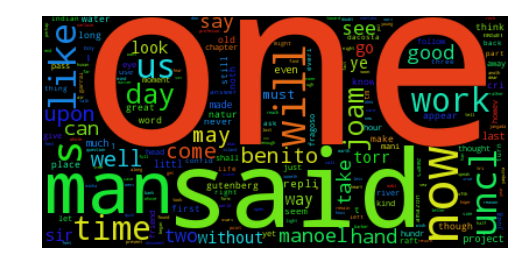

In [76]:
plt.imshow(wordcloud0)
plt.axis('off')
plt.show()

### Creating a wordcloud for the 2nd topic

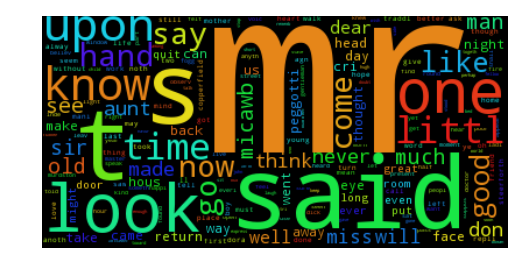

In [77]:
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

### Creating a wordcloud for the 3rd topic

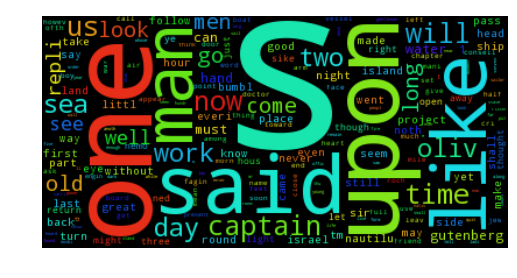

In [78]:
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()